In [14]:
# Import library
import pandas  as pd #Data manipulation
import numpy as np #Data manipulation
import matplotlib.pyplot as plt # Visualization
import seaborn as sns #Visualization


In [15]:
customer = pd.read_csv('C:/Users/M V N POOJITHA/Downloads/Telco-Customer-Churn.csv') #loading dataset
print('\nNumber of rows and columns in the data set: ',customer.shape)  #displaying rows and cols
print('')
customer.head() #display dataset



Number of rows and columns in the data set:  (7043, 21)



,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [16]:
customer.info()  #information of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

In [17]:
print ("Rows     : " ,customer.shape[0])   #print no.of rows
print ("Columns  : " ,customer.shape[1])   #print no.of cols
print ("\nFeatures : \n" ,customer.columns.tolist())   #print columns list
print ("\nMissing values :  ", customer.isnull().sum().values.sum())    #print missing values
print ("\nUnique values :  \n",customer.nunique())   #print unique values

Rows     :  7043
Columns  :  21

Features : 
 ['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']

Missing values :   0

Unique values :  
 customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64


In [18]:
customer.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


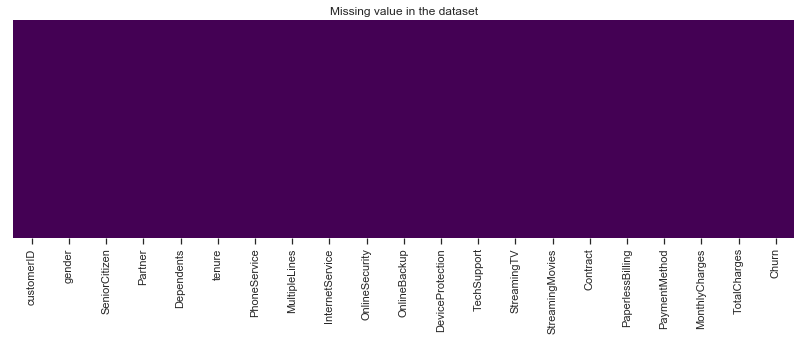

In [19]:
#checking for missing values
plt.figure(figsize=(14,4))
sns.heatmap(customer.isnull(),cbar=False,cmap='viridis',yticklabels=False)
plt.title('Missing value in the dataset');


In [20]:
customer['Churn'][:5] #print churn values upto index 5

0     No
1     No
2    Yes
3     No
4    Yes
Name: Churn, dtype: object

In [21]:
customer['Churn'] = customer['Churn'].replace({"Yes":1,"No":0})  #replacing '1' value for 'yes' and '0' value for 'no'
customer['Churn'][:5]

0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int64

In [22]:
cols = ['OnlineBackup', 'StreamingMovies','DeviceProtection','TechSupport','OnlineSecurity','StreamingTV']
for values in cols:
    customer[values] = customer[values].replace({'No internet service':'No'})

In [23]:
customer['TotalCharges'] = customer['TotalCharges'].replace(" ",np.nan)

# Drop null values of 'Total Charges' feature
customer= customer[customer["TotalCharges"].notnull()]
customer= customer.reset_index()[customer.columns]

customer['TotalCharges'] = customer['TotalCharges'].astype(float)
customer['TotalCharges'].dtype


dtype('float64')

In [24]:
customer['Churn'].value_counts().unique()  #print yes  and no values for chunk in an array

array([5163, 1869], dtype=int64)

In [25]:
churn_data= pd.get_dummies(customer, columns = ['Contract','Dependents','DeviceProtection','gender',
                                                        'InternetService','MultipleLines','OnlineBackup',
                                                        'OnlineSecurity','PaperlessBilling','Partner',
                                                        'PaymentMethod','PhoneService','SeniorCitizen',
                                                        'StreamingMovies','StreamingTV','TechSupport'],
                              drop_first=True)
churn_data.head()      

,customerID,tenure,MonthlyCharges,TotalCharges,Churn,Contract_One year,Contract_Two year,Dependents_Yes,DeviceProtection_Yes,gender_Male,...,PaperlessBilling_Yes,Partner_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,PhoneService_Yes,SeniorCitizen_1,StreamingMovies_Yes,StreamingTV_Yes,TechSupport_Yes
0,7590-VHVEG,1,29.85,29.85,0,0,0,0,0,0,...,1,1,0,1,0,0,0,0,0,0
1,5575-GNVDE,34,56.95,1889.50,0,1,0,0,1,1,...,0,0,0,0,1,1,0,0,0,0
2,3668-QPYBK,2,53.85,108.15,1,0,0,0,0,1,...,1,0,0,0,1,1,0,0,0,0
3,7795-CFOCW,45,42.30,1840.75,0,1,0,0,1,1,...,0,0,0,0,0,0,0,0,0,1
4,9237-HQITU,2,70.70,151.65,1,0,0,0,0,0,...,1,0,0,1,0,1,0,0,0,0


In [26]:
from sklearn.preprocessing import StandardScaler

#Perform Feature Scaling on 'tenure', 'MonthlyCharges', 'TotalCharges' in order to bring them on same scale
standard = StandardScaler()
columns_for_ft_scaling = ['tenure', 'MonthlyCharges', 'TotalCharges']

#Apply the feature scaling operation on dataset using fit_transform() method
churn_data[columns_for_ft_scaling] = standard.fit_transform(churn_data[columns_for_ft_scaling])
churn_data.head()

,customerID,tenure,MonthlyCharges,TotalCharges,Churn,Contract_One year,Contract_Two year,Dependents_Yes,DeviceProtection_Yes,gender_Male,...,PaperlessBilling_Yes,Partner_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,PhoneService_Yes,SeniorCitizen_1,StreamingMovies_Yes,StreamingTV_Yes,TechSupport_Yes
0,7590-VHVEG,-1.280248,-1.161694,-0.994194,0,0,0,0,0,0,...,1,1,0,1,0,0,0,0,0,0
1,5575-GNVDE,0.064303,-0.260878,-0.173740,0,1,0,0,1,1,...,0,0,0,0,1,1,0,0,0,0
2,3668-QPYBK,-1.239504,-0.363923,-0.959649,1,0,0,0,0,1,...,1,0,0,0,1,1,0,0,0,0
3,7795-CFOCW,0.512486,-0.747850,-0.195248,0,1,0,0,1,1,...,0,0,0,0,0,0,0,0,0,1
4,9237-HQITU,-1.239504,0.196178,-0.940457,1,0,0,0,0,0,...,1,0,0,1,0,1,0,0,0,0


In [27]:
list(churn_data.columns)

['customerID',
 'tenure',
 'MonthlyCharges',
 'TotalCharges',
 'Churn',
 'Contract_One year',
 'Contract_Two year',
 'Dependents_Yes',
 'DeviceProtection_Yes',
 'gender_Male',
 'InternetService_Fiber optic',
 'InternetService_No',
 'MultipleLines_No phone service',
 'MultipleLines_Yes',
 'OnlineBackup_Yes',
 'OnlineSecurity_Yes',
 'PaperlessBilling_Yes',
 'Partner_Yes',
 'PaymentMethod_Credit card (automatic)',
 'PaymentMethod_Electronic check',
 'PaymentMethod_Mailed check',
 'PhoneService_Yes',
 'SeniorCitizen_1',
 'StreamingMovies_Yes',
 'StreamingTV_Yes',
 'TechSupport_Yes']

In [28]:
from sklearn.model_selection import train_test_split
# Split Into Training and Testing Sets
X = churn_data.drop(['Churn','customerID'], axis=1)
y = churn_data['Churn']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(4922, 24)
(4922,)
(2110, 24)
(2110,)
